In [1]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Conv2D, MaxPool2D, Average, Flatten, Dropout, Activation
from keras.utils import to_categorical, plot_model,vis_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from skimage import io
import imutils
import pandas as pd
import numpy as np
import cv2
import os
import imutils
from PIL import Image

from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (80, 80, 3), classes = 8)





80142336/80134624 [==============================] - 3s 0us/step








In [0]:
class DataModel:
    """
            DataModel
            not used currently in the program.
    """
    def __init__(self):
        self.items_labels = None
        self.images = []
        self.curated_data = {}
    def add_image(self, image_array):
        self.images.append(image_array)
    def add_labels(self, df):
        self.item_labels = df
    def add_curated_data(self, image, emotion):
        self.curated_data['image'] = image
        self.curated_data['emotion'] = emotion



# Loads the data and returns the image and emotions in a list format
def load_data(number_of_items=20):
    """
        number_of_items -> Number of items to return
        returns the data in a dictionary of images and labels.
    """
    path = "gdrive/My Drive/IMFDB_final"
    data = [] 
    curated_data = {"images":[], "emotions":[]}
    for actor_name in os.listdir(path)[:number_of_items]:
        # At the start of the iteration build a data model
        data_model = DataModel()
        if actor_name == ".DS_Store":
            continue
        print ("Going through actor:" + actor_name)
        for movie_folder_name in os.listdir(path+"/"+actor_name):
            print ("Goining through movie: ", movie_folder_name)
            if movie_folder_name == ".DS_Store":
                continue
            for items in os.listdir(path+"/"+actor_name+"/"+movie_folder_name):
                if items == ".DS_Store":
                    continue
                if items.endswith(".txt"):
                    print (items)
                    try:
                        print ("added")
                        df = pd.read_table(path+"/"+actor_name+"/"+movie_folder_name+"/"+items,header=None, engine="c")
                        data_model.add_labels(df) 
                        for image in os.listdir(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"):
                            #print (image)
                            if image == ".DS_Store":
                                continue
                            print ("going through image: ", image)
                            for d in df.values:
                                if d[2] == image:  
                                    
                                    im = cv2.imread(path+"/"+actor_name+"/"+movie_folder_name+"/"+"images"+"/"+image)
                                    im = cv2.resize(im, (80,80)) # Changing into 80x80X3
                                    #print(im.shape)
                                    #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
                                    
                                    
                                    data_model.add_curated_data(im, d[11])
                                    curated_data['images'].append(im)
                                    curated_data['emotions'].append(d[11])  # d[11] is where the emotion is there
                    except:
                        df = None                    
            data.append(data_model) # Save all the data

    return curated_data


# Test an image
"""
def test_image(image_url):
   

    img = imutils.url_to_image(image_url)
    img = cv2.resize(img, (80,80))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(img)
    prediction = np.argmax(model.predict(img.reshape(1,80,80,3)))
    print ( "The image is: ", get_emotion_from_class(prediction))
    
    
"""


In [5]:
data = load_data(number_of_items=40) 

Going through actor:AamairKhan
Goining through movie:  AndazApnaApna
AndazApnaApna.txt
added
going through image:  AamirKhan_69.jpg
going through image:  AamirKhan_55.jpg
going through image:  AamirKhan_237.jpg
going through image:  AamirKhan_41.jpg
going through image:  AamirKhan_96.jpg
going through image:  AamirKhan_182.jpg
going through image:  AamirKhan_82.jpg
going through image:  AamirKhan_155.jpg
going through image:  AamirKhan_141.jpg
going through image:  AamirKhan_196.jpg
going through image:  AamirKhan_169.jpg
going through image:  AamirKhan_168.jpg
going through image:  AamirKhan_140.jpg
going through image:  AamirKhan_154.jpg
going through image:  AamirKhan_183.jpg
going through image:  AamirKhan_236.jpg
going through image:  AamirKhan_222.jpg
going through image:  AamirKhan_197.jpg
going through image:  AamirKhan_83.jpg
going through image:  AamirKhan_97.jpg
going through image:  AamirKhan_40.jpg
going through image:  AamirKhan_56.jpg
going through image:  AamirKhan_54.j

In [6]:
print(len(data['images']))
encoder = LabelEncoder()
encoder.fit(data['emotions'])

11676


LabelEncoder()

In [0]:
# Label Encoding all the emotion data
data['emotions'] = encoder.transform(data['emotions'])

In [0]:
all_the_classes = encoder.classes_
mapping = {0: 'ANGER',
 1: 'ANGER NONE',
 2: 'DISGUST',
 3: 'FEAR',
 4: 'HAPPINESS',
 5: 'NEUTRAL',
 6: 'SADNESS',
 7: 'SURPRISE'}

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
        return mapping.get(class_number)
    else:
        return -1 # No such class

In [0]:
# Extracting features and labels
features = np.array(data['images'])
labels = data['emotions']


In [10]:
print ("Shape of features: ", features.shape)
print ("Shape of labels: ", labels.shape)

Shape of features:  (11676, 80, 80, 3)
Shape of labels:  (11676,)


In [0]:
labels = to_categorical(labels, num_classes=len(mapping))

In [12]:
# Splitting
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)
print(features_train.shape)

(8757, 80, 80, 3)


In [0]:
# Prepare the training images
features_train = features_train.reshape(len(features_train), 80, 80, 3)
features_train = features_train.astype('float32')
features_train /= 255

# Prepare the test images
features_test = features_test.reshape(len(features_test), 80, 80, 3)
features_test = features_test.astype('float32')
features_test /= 255

In [0]:
# Preprocessing the input 
features_train = preprocess_input(features_train)
features_test = preprocess_input(features_test)
#X_test = preprocess_input(X_test)

In [15]:
train_features = vgg19.predict(features_train, batch_size=256, verbose=1)
test_features = vgg19.predict(features_test, batch_size=256, verbose=1)



2919/2919 [==============================] - 228s 78ms/step


In [16]:
print(train_features.shape)
print(features_train.shape)
print(train_features[0].shape)

(8757, 2, 2, 512)
(8757, 80, 80, 3)
(2, 2, 512)


In [0]:
model = models.Sequential()
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(50, activation="relu"))
model.add(Flatten())
model.add(layers.Dense(len(mapping), activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fa9e537c828>>

In [0]:
tensorboard = TensorBoard()
earlystopping = EarlyStopping(patience=3)

In [79]:
# Training
history=model.fit(train_features, labels_train, epochs=100, batch_size=32, callbacks=[tensorboard,earlystopping], validation_data=(test_features, labels_test))

Train on 8757 samples, validate on 2919 samples
Epoch 1/100
8757/8757 [==============================] - 1s 116us/step - loss: 1.6307 - acc: 0.3171 - val_loss: 1.6257 - val_acc: 0.3443
Epoch 2/100
8757/8757 [==============================] - 1s 127us/step - loss: 1.6283 - acc: 0.3251 - val_loss: 1.6253 - val_acc: 0.3443
Epoch 3/100
8757/8757 [==============================] - 1s 123us/step - loss: 1.6265 - acc: 0.3197 - val_loss: 1.6268 - val_acc: 0.3443
Epoch 4/100
8757/8757 [==============================] - 1s 121us/step - loss: 1.6269 - acc: 0.3259 - val_loss: 1.6263 - val_acc: 0.3443
Epoch 5/100
8757/8757 [==============================] - 1s 127us/step - loss: 1.6250 - acc: 0.3281 - val_loss: 1.6242 - val_acc: 0.3443
Epoch 6/100
8757/8757 [==============================] - 1s 129us/step - loss: 1.6255 - acc: 0.3265 - val_loss: 1.6244 - val_acc: 0.3443
Epoch 7/100
8757/8757 [==============================] - 1s 129us/step - loss: 1.6263 - acc: 0.3235 - val_loss: 1.6237 - val_acc: 

In [0]:
result_predict=[]
result_actual=[]

# Test an image
def test_image(image_url):
    print(image_url.shape)
    #img = cv2.resize(image_url, (2,2))
    #plt.imshow(img)
    #print(img.shape)
    prediction = np.argmax(model.predict(image_url.reshape(1,2,2,512)))
    result_predict.append(get_emotion_from_class(prediction))
    print ( "The image is: ", get_emotion_from_class(prediction))

# Get emotion from class number   
def get_emotion_from_class(class_number):
    """
        gets the corresponding emotion from the class
    """
    if mapping.get(class_number,None):
      return mapping.get(class_number)
    else:
      return -1 # No such class


In [81]:
count=0
for i in test_features:
    print(count)
    count=count+1
    test_image(i)
    



0
(2, 2, 512)
The image is:  HAPPINESS
1
(2, 2, 512)
The image is:  HAPPINESS
2
(2, 2, 512)
The image is:  HAPPINESS
3
(2, 2, 512)
The image is:  HAPPINESS
4
(2, 2, 512)
The image is:  HAPPINESS
5
(2, 2, 512)
The image is:  HAPPINESS
6
(2, 2, 512)
The image is:  HAPPINESS
7
(2, 2, 512)
The image is:  HAPPINESS
8
(2, 2, 512)
The image is:  HAPPINESS
9
(2, 2, 512)
The image is:  HAPPINESS
10
(2, 2, 512)
The image is:  HAPPINESS
11
(2, 2, 512)
The image is:  HAPPINESS
12
(2, 2, 512)
The image is:  HAPPINESS
13
(2, 2, 512)
The image is:  HAPPINESS
14
(2, 2, 512)
The image is:  HAPPINESS
15
(2, 2, 512)
The image is:  HAPPINESS
16
(2, 2, 512)
The image is:  HAPPINESS
17
(2, 2, 512)
The image is:  HAPPINESS
18
(2, 2, 512)
The image is:  HAPPINESS
19
(2, 2, 512)
The image is:  HAPPINESS
20
(2, 2, 512)
The image is:  HAPPINESS
21
(2, 2, 512)
The image is:  HAPPINESS
22
(2, 2, 512)
The image is:  HAPPINESS
23
(2, 2, 512)
The image is:  HAPPINESS
24
(2, 2, 512)
The image is:  HAPPINESS
25
(2, 2, 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


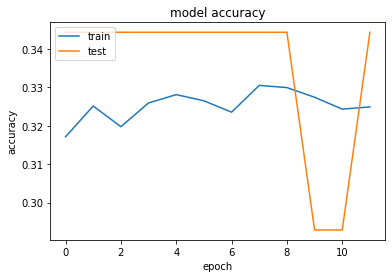

In [85]:
print(history)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()